In [3]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

import pandas as pd
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['font.size'] = 14

from matplotlib.ticker import ScalarFormatter, LogLocator


In [37]:
ckio_data = "results/1node/ckio.txt"
df = pd.read_csv(ckio_data, sep=' ', header=None, names=['nreaders', 'nbc', 'npes', 'nnodes', 'filesize', 'time'])

naive_data = "results/1node/naive.txt"
naivedf = pd.read_csv(naive_data, sep=' ', header=None, names=['nreaders', 'npes', 'nnodes', 'filesize', 'time'])

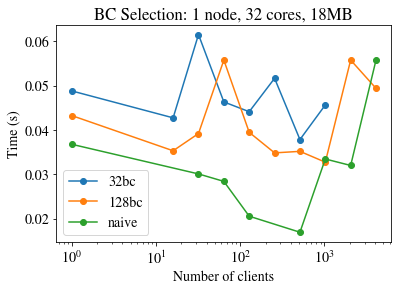

In [40]:
# PLOT BUFFER CHARES AGAINST TIME
fig, ax = plt.subplots()

for bc in [32, 128]:
    # select based on the following parameters
    pes = 32
    filesize = 18844054

    # select and group by
    filtered = df[(df['nbc'] == bc) & (df['npes'] == pes) & (df['filesize'] == filesize)].groupby(['nreaders']).mean()
    ax.plot(filtered.index, filtered['time'], marker='o', label='Time')

filtered = naivedf[(naivedf['npes'] == 32) & (naivedf['filesize'] == 18844054)].groupby(['nreaders']).mean()   
ax.plot(filtered.index, filtered['time'], marker='o', label='Time', )

ax.set_xlabel('Number of clients')
ax.set_ylabel('Time (s)')
ax.legend(["32bc", "128bc", "naive"])
plt.title("BC Selection: 1 node, 32 cores, 18MB")
ax.set_xscale('log')
